0     328.089369
1     345.585482
2     366.440935
3     390.458721
4     416.463859
         ...    
95    326.115202
96    305.834401
97    285.422512
98    264.770434
99    245.795347
Length: 100, dtype: float64
400    136.539112
401    152.816866
402    173.525365
403    195.114463
404    219.416140
          ...    
495    109.146231
496     80.051839
497     52.932738
498     26.002136
499      0.000000
Length: 100, dtype: float64
Saved figure = ../plots/deltaE_dependence_vacuum.pdf


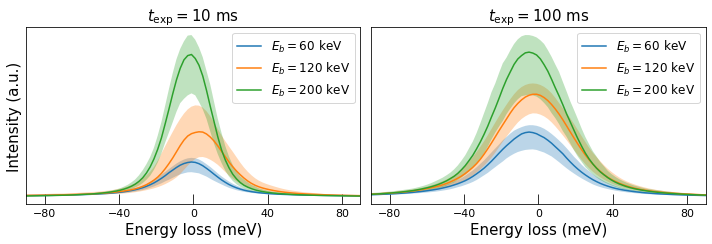

In [99]:
import numpy as np
from numpy import loadtxt
import math
import scipy
#import sklearn
from scipy import optimize
from scipy import signal
from scipy import interpolate
from scipy.optimize import leastsq
from io import StringIO
from scipy.interpolate import UnivariateSpline
from matplotlib import gridspec
from  matplotlib import rc
from  matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

###################### Load data ################################################


energy_file = pd.read_csv('data/interpolation_120keV_full')

energy_file.head()

energy_file_rescaled = energy_file.copy()


scaler = MinMaxScaler(feature_range=(0, 1))
to_scale = energy_file.iloc[:, 4:]
scaler.fit(to_scale)
    
arrays_rescaled = scaler.transform(to_scale)

energy_file_rescaled.iloc[:, 4:] = arrays_rescaled

energy_file_rescaled.describe()
groups_full = energy_file_rescaled.groupby(['time', 'energy'])

ncols, nrows = 2,1
gs = matplotlib.gridspec.GridSpec(nrows,ncols)

plt.figure(figsize=(ncols*5,nrows*3.5))

bla = pd.DataFrame()

for name, group in groups_full:
    
    mean_prediction = group.iloc[:, 4:].median(axis=1)
    std_prediction = group.iloc[:, 4:].std(axis=1)
    up_prediction = group.iloc[:, 4:].quantile(.84, axis=1).to_numpy()
    down_prediction = group.iloc[:, 4:].quantile(.16, axis=1).to_numpy()
    
    
    if group['time'].max() == .1:
        if group['energy'].max() == .6:
            normalization = 29211
            mean_prediction1060 = mean_prediction * normalization
            print(mean_prediction1060)
        if group['energy'].max() == 2:
            normalization = 126021
            mean_prediction10200 = mean_prediction * normalization
            print(mean_prediction10200)
        if group['energy'].max() == 1.2:
            normalization = 77616
            up_prediction = group.iloc[:, 4:].quantile(.7, axis=1).to_numpy()
            down_prediction = group.iloc[:, 4:].quantile(.3, axis=1).to_numpy()
            
        mean_prediction = mean_prediction * normalization 
        up_prediction = up_prediction * normalization 
        down_prediction = down_prediction * normalization 
        bla['mean%(s)s'%{"s": name}] = mean_prediction
        
        if group['energy'].max() == 1.2:
            wl = 6
            mean_prediction = smooth(mean_prediction, wl)
            up_prediction = smooth(up_prediction, wl)
            down_prediction = smooth(down_prediction, wl)

            
        i = 0
        ax = plt.subplot(gs[i])
        ax.set_title(r'$t_{\rm exp}=10~{\rm ms}$', fontsize = 15)
        ax.set_ylabel('Intensity (a.u.)', fontsize = 15)
        #ax.set_ylim([0, 1])
        lab = r"$E_b=$"+str(int(name[1] * 100))+" keV"
        ax.plot(group.x*1000, (mean_prediction), linestyle=line, label=lab)
        ax.fill_between(group.x*1000, up_prediction, down_prediction, alpha=.3)
        
        bla['x'] = np.linspace(-100, 100, 100)
        bla['mean%(s)s'%{"s": name}] = np.array(mean_prediction)
        bla['up%(s)s'%{"s": name}] = up_prediction
        bla['down%(s)s'%{"s": name}] = down_prediction
            
    if group['time'].max() == 1:
        if group['energy'].max() == .6:
            normalization = 315762
        if group['energy'].max() == 2:
            normalization = 713038   
        if group['energy'].max() == 1.2:
            normalization = 514400
            up_prediction = group.iloc[:, 4:].quantile(.7, axis=1).to_numpy()
            down_prediction = group.iloc[:, 4:].quantile(.3, axis=1).to_numpy()
            
        mean_prediction = mean_prediction * normalization 
        up_prediction = up_prediction * normalization 
        down_prediction = down_prediction * normalization 
        
        if group['energy'].max() == 1.2:
            wl = 6
            mean_prediction = smooth(mean_prediction, wl)
            up_prediction = smooth(up_prediction, wl)
            down_prediction = smooth(down_prediction, wl)
        bla['x'] = np.linspace(-100, 100, 100)
        bla['mean%(s)s'%{"s": name}] = np.array(mean_prediction)
        bla['up%(s)s'%{"s": name}] = up_prediction
        bla['down%(s)s'%{"s": name}] = down_prediction
        
        i = 1
        ax = plt.subplot(gs[i])
        ax.set_title(r'$t_{\rm exp}=100~{\rm ms}$', fontsize = 15)
        lab = r"$E_b=$"+str(int(name[1] * 100))+" keV"
        ax.plot(group.x*1000, (mean_prediction),  linestyle=line, label=lab)
        #ax.set_ylim([0, 1.2])
        
        ax.fill_between(group.x*1000, up_prediction, down_prediction, alpha=.3)
        
        
            
    ax.set_xlim([-90, 90])
    ax.set_yticks([])
    ax.set_xticks([-80, -40, 0, 40, 80])
    ax.set_xlabel('Energy loss (meV)', fontsize = 15)
    ax.tick_params(which='major',direction='in',length=10, labelsize=11)
    ax.tick_params(which='minor',length=10, labelsize=11)

    ax.legend(fontsize = 12)
    
plt.tight_layout()
plt.savefig('../plots/deltaE_dependence_vacuum.pdf')
print("Saved figure = ../plots/deltaE_dependence_vacuum.pdf")



In [101]:

bla.to_csv('data/interpolation120file')

<ipython-input-28-3f08ab2059f2>:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(gs[k])
<ipython-input-28-3f08ab2059f2>:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(gs[k])
<ipython-input-28-3f08ab2059f2>:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

Saved figure = ../plots/deltaE_dependence_vacuum.pdf


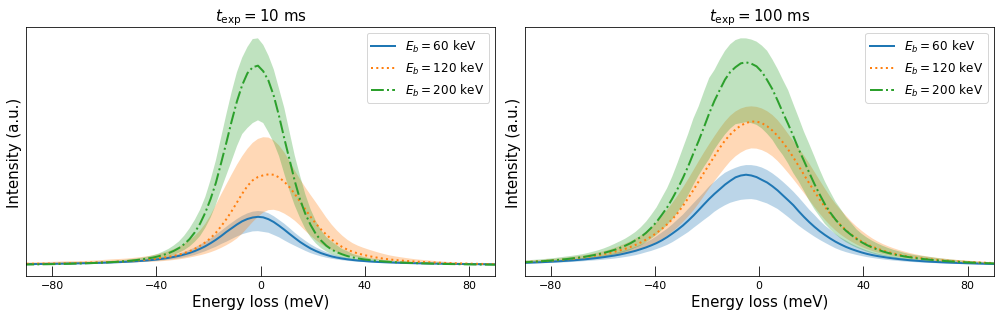

In [28]:
import numpy as np
from numpy import loadtxt
import math
import scipy
#import sklearn
from scipy import optimize
from scipy import signal
from scipy import interpolate
from scipy.optimize import leastsq
from io import StringIO
from scipy.interpolate import UnivariateSpline
from matplotlib import gridspec
from  matplotlib import rc
from  matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

###################### Load data ################################################


energy_file = pd.read_csv('data/interpolation120file')

energy_file.head()

ncols, nrows = 2,1

gs = matplotlib.gridspec.GridSpec(nrows,ncols)
plt.figure(figsize=(ncols*7,nrows*4.5))

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
lines=['-', 'dotted', 'dashdot']

for j,i  in enumerate([['(0.1, 0.6)', 60], ['(0.1, 1.2)', 120], ['(0.1, 2.0)', 200]]):
    k = 0
    ax=plt.subplot(gs[k])
    ax.set_title(r'$t_{\rm exp}=10~{\rm ms}$', fontsize = 15)
    ax.set_ylabel('Intensity (a.u.)', fontsize = 15)
    ax.set_xlim([-90, 90])
    ax.set_yticks([])
    ax.set_xticks([-80, -40, 0, 40, 80])
    ax.set_xlabel('Energy loss (meV)', fontsize = 15)
    ax.tick_params(which='major',direction='in',length=10, labelsize=11)
    ax.tick_params(which='minor',length=10, labelsize=11)
    
    lab = r"$E_b=$"+str(i[1])+" keV"
    
    ax.plot(energy_file['x'], energy_file['mean%(i)s'%{"i": i[0]}], linestyle=lines[j], linewidth = 2, label=lab)
    ax.fill_between(energy_file['x'], energy_file['up%(i)s'%{"i": i[0]}], \
                    energy_file['down%(i)s'%{"i": i[0]}], alpha=.3)
    ax.legend(fontsize = 12)
    
for j,i  in enumerate([['(1.0, 0.6)', 60], ['(1.0, 1.2)', 120], ['(1.0, 2.0)', 200]]):
    k = 1
    ax=plt.subplot(gs[k])
    ax.set_title(r'$t_{\rm exp}=100~{\rm ms}$', fontsize = 15)
    ax.set_ylabel('Intensity (a.u.)', fontsize = 15)
        #ax.set_ylim([0, 1])
    lab = r"$E_b=$"+str(i[1])+" keV"
    
    ax.set_xlim([-90, 90])
    ax.set_yticks([])
    ax.set_xticks([-80, -40, 0, 40, 80])
    ax.set_xlabel('Energy loss (meV)', fontsize = 15)
    ax.tick_params(which='major',direction='in',length=10, labelsize=11)
    ax.tick_params(which='minor',length=10, labelsize=11)
    
    ax.plot(energy_file['x'], energy_file['mean%(i)s'%{"i": i[0]}], linestyle=lines[j], linewidth = 2, label=lab)
    ax.fill_between(energy_file['x'], energy_file['up%(i)s'%{"i": i[0]}], \
                    energy_file['down%(i)s'%{"i": i[0]}], alpha=.3)
    ax.legend(fontsize = 12)

    
plt.tight_layout()
plt.savefig('../plots/deltaE_dependence_vacuum.pdf')
print("Saved figure = ../plots/deltaE_dependence_vacuum.pdf")


